In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("DataBCHeadset.xlsx")

In [3]:
data.head()

,Country,University,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,Simon Fraser University,NaN,NaN,NaN,2.0,2.0,2.0,3.0,1.0,NaN,NaN
1,NaN,The University of British Columbia (Okanagan),NaN,1.0,1.0,NaN,NaN,1.0,1.0,2.0,2.0,NaN
2,NaN,The University of British Columbia (Vancouver),NaN,1.0,1.0,3.0,3.0,4.0,4.0,3.0,2.0,1.0
3,NaN,The University of Victoria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0
4,NaN,Thompson Rivers University,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [4]:
data['Country'] = data['Country'].ffill()

In [5]:
data

,Country,University,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,Simon Fraser University,NaN,NaN,NaN,2.0,2.0,2.0,3.0,1.0,NaN,NaN
1,Afghanistan,The University of British Columbia (Okanagan),NaN,1.0,1.0,NaN,NaN,1.0,1.0,2.0,2.0,NaN
2,Afghanistan,The University of British Columbia (Vancouver),NaN,1.0,1.0,3.0,3.0,4.0,4.0,3.0,2.0,1.0
3,Afghanistan,The University of Victoria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0
4,Afghanistan,Thompson Rivers University,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
890,Unknown/Stateless,The University of British Columbia (Vancouver),13.0,4.0,5.0,4.0,5.0,6.0,6.0,7.0,6.0,6.0
891,Unknown/Stateless,The University of Northern British Columbia,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
892,Unknown/Stateless,The University of Victoria,6.0,4.0,6.0,4.0,5.0,3.0,NaN,NaN,NaN,NaN
893,Unknown/Stateless,Thompson Rivers University,79.0,58.0,17.0,25.0,42.0,49.0,81.0,61.0,46.0,49.0


In [6]:
# Convert the dataset from wide to long format
data_long = pd.melt(data, id_vars=['Country', 'University'], var_name='Year', value_name='Enrollment')
data_long['Year'] = data_long['Year'].astype(int)  # Ensure the 'Year' column is of integer type
data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')  # Convert Enrollment to numeric, setting errors='coerce' will convert non-numeric values to NaN


In [7]:
data_long

,Country,University,Year,Enrollment
0,Afghanistan,Simon Fraser University,2014,NaN
1,Afghanistan,The University of British Columbia (Okanagan),2014,NaN
2,Afghanistan,The University of British Columbia (Vancouver),2014,NaN
3,Afghanistan,The University of Victoria,2014,NaN
4,Afghanistan,Thompson Rivers University,2014,NaN
...,...,...,...,...
8945,Unknown/Stateless,The University of British Columbia (Vancouver),2023,6.0
8946,Unknown/Stateless,The University of Northern British Columbia,2023,NaN
8947,Unknown/Stateless,The University of Victoria,2023,NaN
8948,Unknown/Stateless,Thompson Rivers University,2023,49.0


In [8]:
data_long=data_long[data_long['Country']!= 'Grand Total']

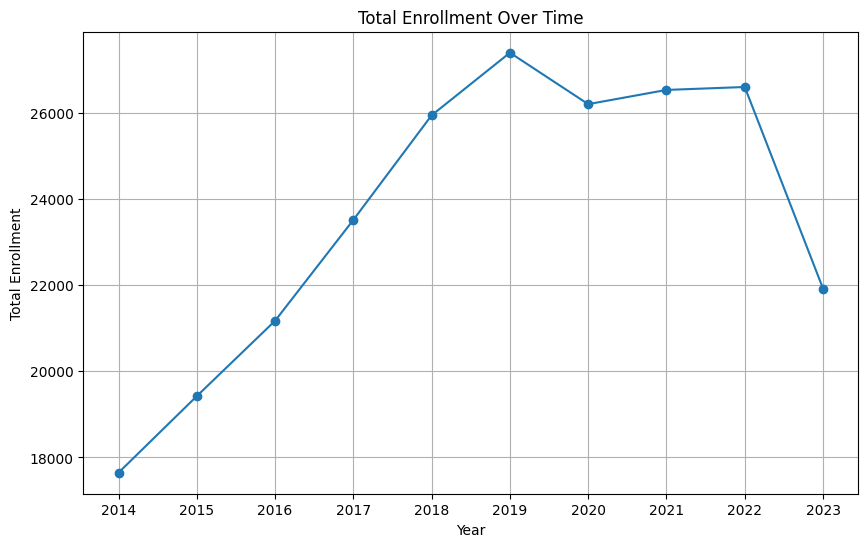

In [9]:
# Total enrollment over time
plt.figure(figsize=(10, 6))
data_long.groupby('Year')['Enrollment'].sum().plot(kind='line', marker='o')
plt.xticks(data_long['Year'].unique())
plt.title('Total Enrollment Over Time')
plt.xlabel('Year')
plt.ylabel('Total Enrollment')
plt.grid(True)
plt.show()

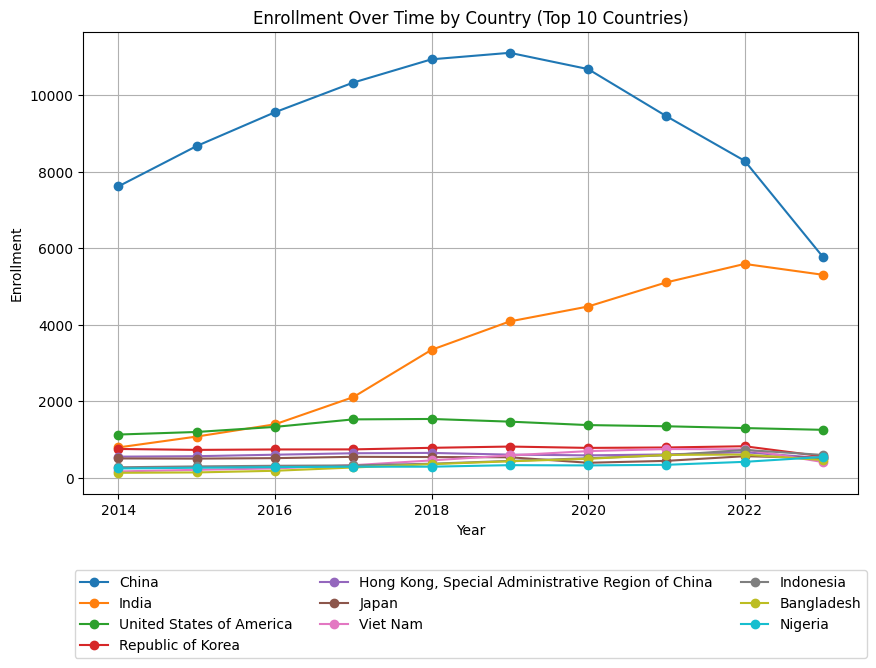

In [10]:
# Enrollment by Country over time for the top 10 countries
plt.figure(figsize=(10, 6))
top_countries = data_long.groupby('Country')['Enrollment'].sum().nlargest(10).index
for country in top_countries:
    data_country = data_long[data_long['Country'] == country]
    data_country.groupby('Year')['Enrollment'].sum().plot(kind='line', marker='o', label=country)
plt.title('Enrollment Over Time by Country (Top 10 Countries)')
plt.xlabel('Year')
plt.ylabel('Enrollment')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.grid(True)
plt.show()

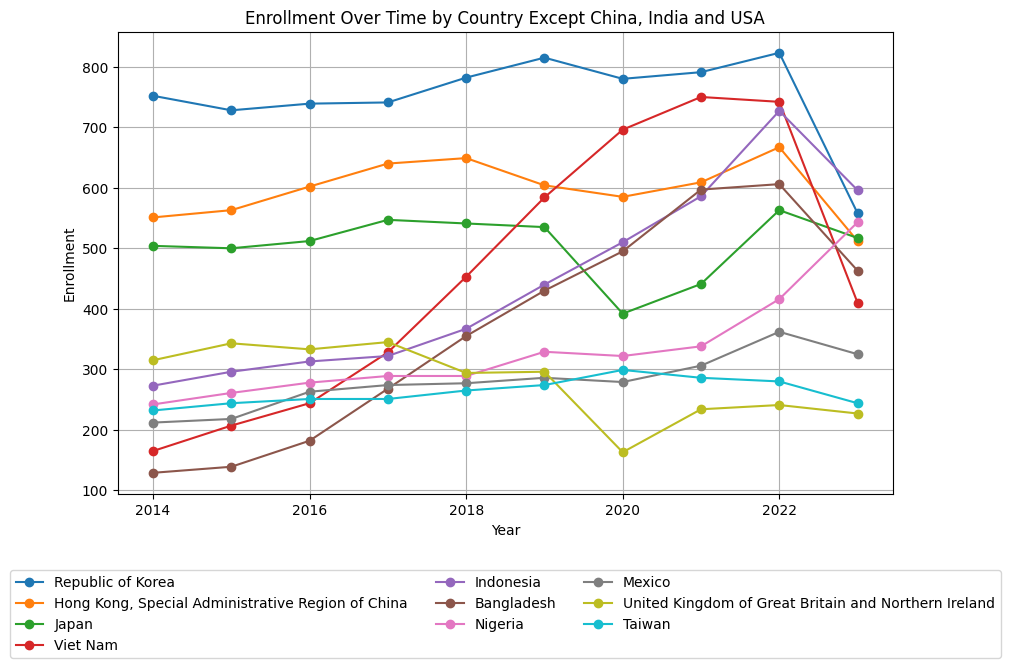

In [11]:
# Enrollment by Country over time for the top 10 countries except China, India and USA
plt.figure(figsize=(10, 6))
top_countries = data_long.groupby('Country')['Enrollment'].sum().nlargest(13).index
top_countries = top_countries[3:]
for country in top_countries:
    data_country = data_long[data_long['Country'] == country]
    data_country.groupby('Year')['Enrollment'].sum().plot(kind='line', marker='o', label=country)
plt.title('Enrollment Over Time by Country Except China, India and USA')
plt.xlabel('Year')
plt.ylabel('Enrollment')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.grid(True)
plt.show()